In [4]:
# Allows loading functions form different path than in which the python kernel starts- IPython starts at the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import mne
import numpy as np

from functions import mne_prepping as mneprep
from functions import mne_helpers as mnehelp
from mne.time_frequency import tfr_multitaper, tfr_stockwell, tfr_morlet

In [6]:
path_perhead = "D:\\IntracranialElectrodes\\Data\\p126\\UnityAlloEgo\\EEG\\Preprocessed\\prep_perHeadbox_250.mat"
path_bip = "D:\\IntracranialElectrodes\\Data\\p126\\UnityAlloEgo\\EEG\\Preprocessed\\prep_bipolar_250.mat"
path_events = "D:\\IntracranialElectrodes\\Data\\p126\\UnityAlloEgo\\experiment_data\\p126_unity500_1500.csv"

In [7]:
FREQUENCY = 250

In [12]:
raw_perhead = mneprep.load_raw(path_perhead, FREQUENCY)
raw_bip = mneprep.load_raw(path_bip, FREQUENCY)

Creating RawArray with float64 data, n_channels=61, n_times=411250


    Range : 0 ... 411249 =      0.000 ...  1644.996 secs


Ready.


Creating RawArray with float64 data, n_channels=49, n_times=411250


    Range : 0 ... 411249 =      0.000 ...  1644.996 secs


Ready.


In [12]:
mne_events, mapp = mneprep.load_events(path_events, FREQUENCY)

In [13]:
raw_perhead.info["bads"] = ['55', '56', '57', '58', '59']
raw_bip.info["bads"] = ['45', '46', '47', '48']

In [14]:
epochs_perhead = mne.Epochs(raw_perhead, mne_events, event_id = mapp, tmin = -1.5, tmax = 2, add_eeg_ref = False)
epochs_bip = mne.Epochs(raw_bip, mne_events, event_id = mapp, tmin=-2, tmax=3, add_eeg_ref = False)

165 matching events found


Applying baseline correction (mode: mean)


0 projection items activated


165 matching events found


Applying baseline correction (mode: mean)


0 projection items activated


In [15]:
onsets_perhead = epochs_perhead['onsets_500_1500']
onsets_bip = epochs_bip['onsets_500_1500']
stops_perhead = epochs_perhead['stops_500_1500']
stops_bip = epochs_bip['stops_500_1500']

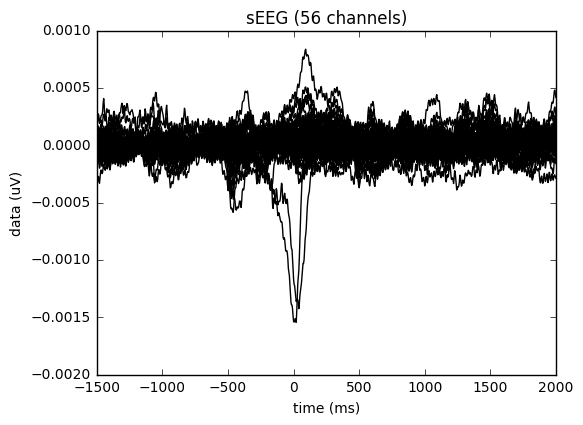

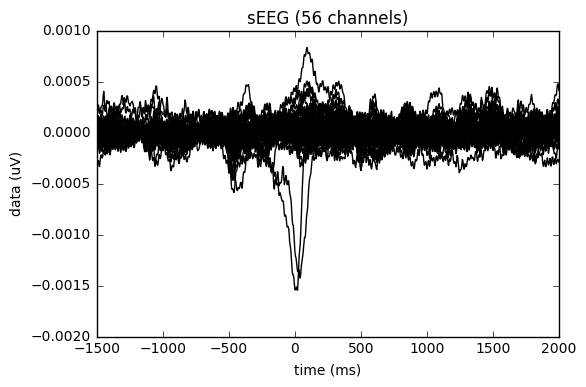

In [16]:
onsets_evoked = onsets_perhead.average()
onsets_evoked.plot()

The bottom ones were 17 and 18. The upper one is channel 14

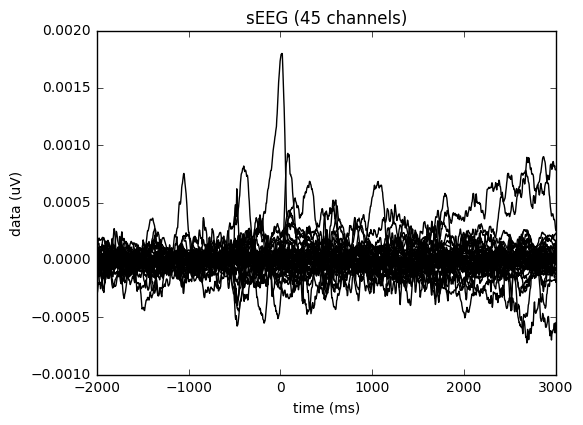

In [17]:
onsets_evoked = onsets_bip.average()
onsets_evoked.plot()

The increased elements around 0 are 34, 15 and 16

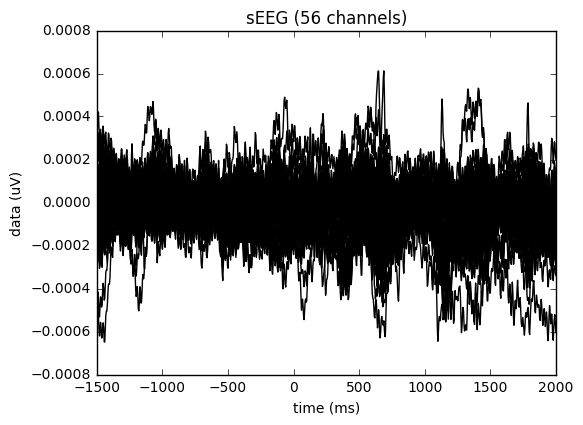

In [18]:
stops_evoked = stops_perhead.average()
stops_evoked.plot()

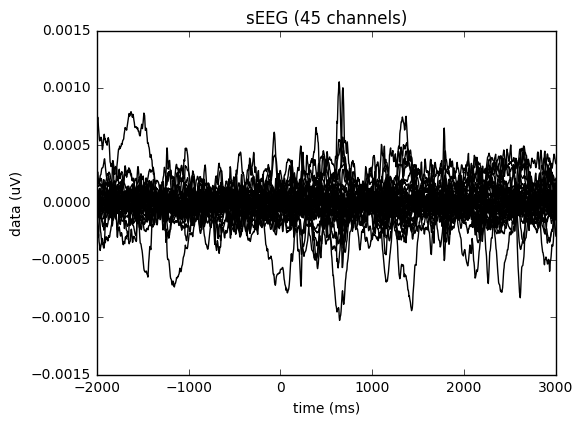

In [19]:
stops_evoked = stops_bip.average()
stops_evoked.plot()